In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
df=files.upload()
df=pd.read_csv('delhi_ppg2_final.csv')

Saving delhi_ppg2_final.csv to delhi_ppg2_final.csv


In [ ]:
df.head()

,city,site_name,state,to_date,to_time,from_date,from_time,pm25,pm10,no2,nh3,so2,co,o3,at,time,day
0,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,04:00:00,01-06-2022,00:00:00,152.81,484.75,130.42,51.87,8.26,3.15,75.56,31.59,01-06-2022 00:00,WEDNESDAY
1,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,08:00:00,01-06-2022,04:00:00,127.25,376.31,107.92,64.07,15.98,0.71,15.90,31.92,01-06-2022 04:00,WEDNESDAY
2,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,12:00:00,01-06-2022,08:00:00,104.38,327.38,73.49,72.41,17.20,0.05,92.30,36.02,01-06-2022 08:00,WEDNESDAY
3,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,16:00:00,01-06-2022,12:00:00,44.44,188.38,21.68,55.05,5.99,1.30,163.49,37.33,01-06-2022 12:00,WEDNESDAY
4,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,20:00:00,01-06-2022,16:00:00,47.50,198.50,56.06,33.14,11.22,1.66,83.58,35.56,01-06-2022 16:00,WEDNESDAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       65 non-null     object 
 1   site_name  65 non-null     object 
 2   state      65 non-null     object 
 3   to_date    65 non-null     object 
 4   to_time    65 non-null     object 
 5   from_date  65 non-null     object 
 6   from_time  65 non-null     object 
 7   pm25       65 non-null     float64
 8   pm10       65 non-null     float64
 9   no2        65 non-null     float64
 10  nh3        65 non-null     float64
 11  so2        65 non-null     float64
 12  co         65 non-null     float64
 13  o3         65 non-null     float64
 14  at         65 non-null     float64
 15  time       65 non-null     object 
 16  day        65 non-null     object 
dtypes: float64(8), object(9)
memory usage: 8.8+ KB


In [ ]:
df.describe()

,pm25,pm10,no2,nh3,so2,co,o3,at
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,65.085846,276.161538,51.251692,34.482154,8.445077,1.320308,57.434462,35.191385
std,27.738140,92.311605,34.061242,10.777522,4.207949,0.624755,52.957130,1.901671
min,27.120000,130.250000,8.430000,19.500000,2.910000,0.050000,0.690000,31.590000
25%,43.750000,214.940000,25.050000,26.550000,5.790000,0.970000,7.450000,33.440000
50%,58.310000,258.500000,50.070000,32.330000,7.440000,1.340000,56.740000,35.390000
75%,78.690000,319.120000,66.880000,39.510000,9.460000,1.590000,89.280000,36.880000
max,152.810000,593.120000,157.880000,72.410000,21.120000,3.750000,189.430000,38.190000


In [ ]:
df.dtypes

city          object
site_name     object
state         object
to_date       object
to_time       object
from_date     object
from_time     object
pm25         float64
pm10         float64
no2          float64
nh3          float64
so2          float64
co           float64
o3           float64
at           float64
time          object
day           object
dtype: object

In [ ]:
df["day_encoded"] = df["from_date"].replace(["01-06-2022","02-06-2022","03-06-2022","04-06-2022","05-06-2022","06-06-2022","07-06-2022","08-06-2022","09-06-2022","10-06-2022","11-06-2022","12-06-2022","13-06-2022"] , [3,4,5,6,7,1,2,3,4,5,6,7,1])

In [ ]:
df["new_time"] = df["from_time"].replace(["00:00:00","04:00:00","08:00:00","12:00:00","16:00:00","20:00:00"] , [1,2,3,4,5,6])

In [ ]:
df

,city,site_name,state,to_date,to_time,from_date,from_time,pm25,pm10,no2,nh3,so2,co,o3,at,time,day,day_encoded,new_time
0,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,04:00:00,01-06-2022,00:00:00,152.81,484.75,130.42,51.87,8.26,3.15,75.56,31.59,01-06-2022 00:00,WEDNESDAY,3,1
1,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,08:00:00,01-06-2022,04:00:00,127.25,376.31,107.92,64.07,15.98,0.71,15.90,31.92,01-06-2022 04:00,WEDNESDAY,3,2
2,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,12:00:00,01-06-2022,08:00:00,104.38,327.38,73.49,72.41,17.20,0.05,92.30,36.02,01-06-2022 08:00,WEDNESDAY,3,3
3,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,16:00:00,01-06-2022,12:00:00,44.44,188.38,21.68,55.05,5.99,1.30,163.49,37.33,01-06-2022 12:00,WEDNESDAY,3,4
4,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,20:00:00,01-06-2022,16:00:00,47.50,198.50,56.06,33.14,11.22,1.66,83.58,35.56,01-06-2022 16:00,WEDNESDAY,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,04:00:00,13-06-2022,00:00:00,39.62,203.25,26.68,25.19,3.71,1.15,23.23,34.54,13-06-2022 00:00,MONDAY,1,1
61,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,08:00:00,13-06-2022,04:00:00,28.50,160.62,28.36,23.41,3.57,1.21,22.35,33.98,13-06-2022 04:00,MONDAY,1,2
62,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,12:00:00,13-06-2022,08:00:00,27.12,149.69,25.05,28.56,5.62,1.29,56.74,35.39,13-06-2022 08:00,MONDAY,1,3
63,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,16:00:00,13-06-2022,12:00:00,49.81,273.31,17.66,42.16,6.58,1.34,97.53,37.29,13-06-2022 12:00,MONDAY,1,4


In [ ]:
X = df.drop( ['city', 'site_name', 'state', 'to_date', 'to_time', 'from_date',
       'from_time','time', 'pm10','day' , 'pm25'], axis=1)
y = df["pm10"]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


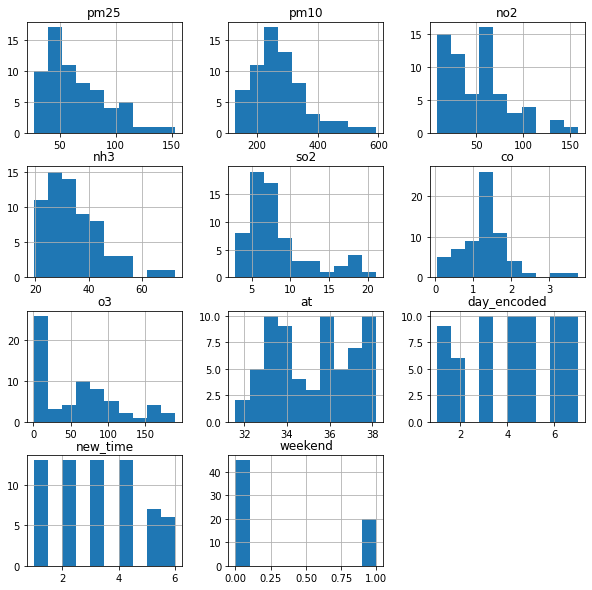

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

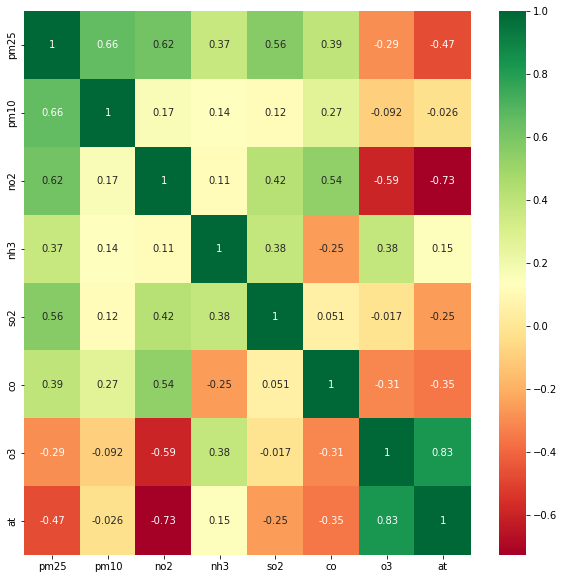

In [ ]:
df7=df.drop(['day_encoded','new_time'],axis=1)



corrmat = df7.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap= "RdYlGn")

# LINEAR Regression model


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
avg_mean_sq_errlr = []
rrlr=[]
for r_s in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = r_s)
  model=LinearRegression()
  model.fit(X_train, y_train)
  Y_pred=model.predict(X_test)
  mean_sq_err1= np.sqrt(np.mean((Y_pred - y_test)**2))
  avg_mean_sq_errlr.append(mean_sq_err1)
  r=r2_score(y_test,Y_pred)
  rrlr.append(r)

avg_mean_sq_err3 = np.mean(avg_mean_sq_errlr)
rr3 = np.mean(rrlr)

In [ ]:

print(avg_mean_sq_err3)
print(rr3)

100.39105706104193
-0.350486860759933


# Random Forest

In [ ]:

from sklearn.ensemble import RandomForestRegressor

In [ ]:
avg_mean_sq_err = []
rr=[]
for r_s in range(100):
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state = r_s)
  model=RandomForestRegressor(n_estimators=100, random_state=r_s)
  model.fit(X_train1, y_train1)
  Y_pred1=model.predict(X_test1)
  mean_sq_err1= np.sqrt(np.mean((Y_pred1 - y_test1)**2))
  avg_mean_sq_err.append(mean_sq_err1)
  r=r2_score(y_test1,Y_pred1)
  rr.append(r)

avg_mean_sq_err1 = np.mean(avg_mean_sq_err)
rr1 = np.mean(rr)

In [ ]:
print(avg_mean_sq_err1)
print(rr1)

83.08621589799137
0.08221672530931784


# SVR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
Y_pred=svr.predict(X_test)

In [ ]:
accuracy=r2_score(y_test,Y_pred )

In [ ]:
accuracy

-0.013239341963850126

In [ ]:
avg_mean_sq_errsvr = []
rrsvr=[]
for r_s in range(100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state = r_s)
  model1=SVR(kernel = 'rbf')
  model1.fit(X_train2, y_train2)
  Y_pred2=model.predict(X_test2)
  mean_sq_err= np.sqrt(np.mean((Y_pred2 - y_test2)**2))
  avg_mean_sq_errsvr.append(mean_sq_err)
  r=r2_score(y_test2,Y_pred2)
  rrsvr.append(r)

avg_mean_sq_err_svr= np.mean(avg_mean_sq_errsvr)
rsvr = np.mean(rrsvr)

In [ ]:
print(r)

0.08024456524719259


In [ ]:
print(avg_mean_sq_err_svr)
print(rsvr)

46.74832327155961
0.6824182851447702


# USING one hot encoder

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 593 kB/s 


In [ ]:
import category_encoders as ce

In [ ]:
ce_model= ce.OneHotEncoder(cols=['day'])

In [ ]:
new = ce_model.fit_transform(df)

In [ ]:
new.head()

,city,site_name,state,to_date,to_time,from_date,from_time,pm25,pm10,no2,...,time,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_encoded,new_time
0,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,04:00:00,01-06-2022,00:00:00,152.81,484.75,130.42,...,01-06-2022 00:00,1,0,0,0,0,0,0,3,1
1,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,08:00:00,01-06-2022,04:00:00,127.25,376.31,107.92,...,01-06-2022 04:00,1,0,0,0,0,0,0,3,2
2,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,12:00:00,01-06-2022,08:00:00,104.38,327.38,73.49,...,01-06-2022 08:00,1,0,0,0,0,0,0,3,3
3,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,16:00:00,01-06-2022,12:00:00,44.44,188.38,21.68,...,01-06-2022 12:00,1,0,0,0,0,0,0,3,4
4,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,20:00:00,01-06-2022,16:00:00,47.50,198.50,56.06,...,01-06-2022 16:00,1,0,0,0,0,0,0,3,5


In [ ]:
new.columns

Index(['city', 'site_name', 'state', 'to_date', 'to_time', 'from_date',
       'from_time', 'pm25', 'pm10', 'no2', 'nh3', 'so2', 'co', 'o3', 'at',
       'time', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_encoded', 'new_time'],
      dtype='object')

In [ ]:
X1 = new.drop( ['city', 'site_name', 'state', 'to_date', 'to_time', 'from_date',
       'from_time','time', 'pm10','day_encoded' ], axis=1)
y1 = new["pm10"]

In [ ]:
X1

,pm25,no2,nh3,so2,co,o3,at,day_1,day_2,day_3,day_4,day_5,day_6,day_7,new_time
0,152.81,130.42,51.87,8.26,3.15,75.56,31.59,1,0,0,0,0,0,0,1
1,127.25,107.92,64.07,15.98,0.71,15.90,31.92,1,0,0,0,0,0,0,2
2,104.38,73.49,72.41,17.20,0.05,92.30,36.02,1,0,0,0,0,0,0,3
3,44.44,21.68,55.05,5.99,1.30,163.49,37.33,1,0,0,0,0,0,0,4
4,47.50,56.06,33.14,11.22,1.66,83.58,35.56,1,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,39.62,26.68,25.19,3.71,1.15,23.23,34.54,0,0,0,0,0,1,0,1
61,28.50,28.36,23.41,3.57,1.21,22.35,33.98,0,0,0,0,0,1,0,2
62,27.12,25.05,28.56,5.62,1.29,56.74,35.39,0,0,0,0,0,1,0,3
63,49.81,17.66,42.16,6.58,1.34,97.53,37.29,0,0,0,0,0,1,0,4


In [ ]:
avg_mean_sq_errlr_new = []
rrlr_new=[]
for r_s in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state = r_s)
  model=LinearRegression()
  model.fit(X_train, y_train)
  Y_pred=model.predict(X_test)
  mean_sq_err1= np.sqrt(np.mean((Y_pred - y_test)**2))
  avg_mean_sq_errlr_new.append(mean_sq_err1)
  r=r2_score(y_test,Y_pred)
  rrlr_new.append(r)

avg_mean_sq_err3 = np.mean(avg_mean_sq_errlr_new)
rr3 = np.mean(rrlr_new)

In [ ]:

print(avg_mean_sq_err3)
print(rr3)

60.73696423562998
0.47019278209022536


In [ ]:
avg_mean_sq_err_new = []
rr_new=[]
for r_s in range(100):
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state = r_s)
  model=RandomForestRegressor(n_estimators=100, random_state=r_s)
  model.fit(X_train1, y_train1)
  Y_pred1=model.predict(X_test1)
  mean_sq_err1= np.sqrt(np.mean((Y_pred1 - y_test1)**2))
  avg_mean_sq_err_new.append(mean_sq_err1)
  r=r2_score(y_test1,Y_pred1)
  rr_new.append(r)

avg_mean_sq_err1 = np.mean(avg_mean_sq_err_new)
rr1 = np.mean(rr_new)

In [ ]:
print(avg_mean_sq_err1)
print(rr1)

54.59961164422643
0.5920578124494628


In [ ]:
avg_mean_sq_errsvr_new = []
rrsvr_new=[]
for r_s in range(100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.3, random_state = r_s)
  model1=SVR(kernel = 'rbf')
  model1.fit(X_train2, y_train2)
  Y_pred2=model.predict(X_test2)
  mean_sq_err= np.sqrt(np.mean((Y_pred2 - y_test2)**2))
  avg_mean_sq_errsvr_new.append(mean_sq_err)
  r=r2_score(y_test2,Y_pred2)
  rrsvr_new.append(r)

avg_mean_sq_err_svr_new= np.mean(avg_mean_sq_errsvr_new)
rsvr_new = np.mean(rrsvr_new)

In [ ]:
print(avg_mean_sq_err_svr_new)
print(rsvr_new)

29.074797792206354
0.8778592082856908


# Weekend-Weekday


In [ ]:
df

,city,site_name,state,to_date,to_time,from_date,from_time,pm25,pm10,no2,nh3,so2,co,o3,at,time,day,day_encoded,new_time
0,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,04:00:00,01-06-2022,00:00:00,152.81,484.75,130.42,51.87,8.26,3.15,75.56,31.59,01-06-2022 00:00,WEDNESDAY,3,1
1,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,08:00:00,01-06-2022,04:00:00,127.25,376.31,107.92,64.07,15.98,0.71,15.90,31.92,01-06-2022 04:00,WEDNESDAY,3,2
2,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,12:00:00,01-06-2022,08:00:00,104.38,327.38,73.49,72.41,17.20,0.05,92.30,36.02,01-06-2022 08:00,WEDNESDAY,3,3
3,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,16:00:00,01-06-2022,12:00:00,44.44,188.38,21.68,55.05,5.99,1.30,163.49,37.33,01-06-2022 12:00,WEDNESDAY,3,4
4,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,20:00:00,01-06-2022,16:00:00,47.50,198.50,56.06,33.14,11.22,1.66,83.58,35.56,01-06-2022 16:00,WEDNESDAY,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,04:00:00,13-06-2022,00:00:00,39.62,203.25,26.68,25.19,3.71,1.15,23.23,34.54,13-06-2022 00:00,MONDAY,1,1
61,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,08:00:00,13-06-2022,04:00:00,28.50,160.62,28.36,23.41,3.57,1.21,22.35,33.98,13-06-2022 04:00,MONDAY,1,2
62,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,12:00:00,13-06-2022,08:00:00,27.12,149.69,25.05,28.56,5.62,1.29,56.74,35.39,13-06-2022 08:00,MONDAY,1,3
63,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,16:00:00,13-06-2022,12:00:00,49.81,273.31,17.66,42.16,6.58,1.34,97.53,37.29,13-06-2022 12:00,MONDAY,1,4


In [ ]:
df["weekend"] = df["day"].replace(["MONDAY","TUESDAY","WEDNESDAY","THURSDAY","FRIDAY","SATURDAY","SUNDAY"] , [0,0,0,0,0,1,1])

In [ ]:
df

,city,site_name,state,to_date,to_time,from_date,from_time,pm25,pm10,no2,nh3,so2,co,o3,at,time,day,day_encoded,new_time,weekend
0,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,04:00:00,01-06-2022,00:00:00,152.81,484.75,130.42,51.87,8.26,3.15,75.56,31.59,01-06-2022 00:00,WEDNESDAY,3,1,0
1,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,08:00:00,01-06-2022,04:00:00,127.25,376.31,107.92,64.07,15.98,0.71,15.90,31.92,01-06-2022 04:00,WEDNESDAY,3,2,0
2,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,12:00:00,01-06-2022,08:00:00,104.38,327.38,73.49,72.41,17.20,0.05,92.30,36.02,01-06-2022 08:00,WEDNESDAY,3,3,0
3,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,16:00:00,01-06-2022,12:00:00,44.44,188.38,21.68,55.05,5.99,1.30,163.49,37.33,01-06-2022 12:00,WEDNESDAY,3,4,0
4,Delhi,"Patparganj, Delhi - DPCC",Delhi,01-06-2022,20:00:00,01-06-2022,16:00:00,47.50,198.50,56.06,33.14,11.22,1.66,83.58,35.56,01-06-2022 16:00,WEDNESDAY,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,04:00:00,13-06-2022,00:00:00,39.62,203.25,26.68,25.19,3.71,1.15,23.23,34.54,13-06-2022 00:00,MONDAY,1,1,0
61,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,08:00:00,13-06-2022,04:00:00,28.50,160.62,28.36,23.41,3.57,1.21,22.35,33.98,13-06-2022 04:00,MONDAY,1,2,0
62,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,12:00:00,13-06-2022,08:00:00,27.12,149.69,25.05,28.56,5.62,1.29,56.74,35.39,13-06-2022 08:00,MONDAY,1,3,0
63,Delhi,"Patparganj, Delhi - DPCC",Delhi,13-06-2022,16:00:00,13-06-2022,12:00:00,49.81,273.31,17.66,42.16,6.58,1.34,97.53,37.29,13-06-2022 12:00,MONDAY,1,4,0


In [ ]:
X2 = df.drop( ['city', 'site_name', 'state', 'to_date', 'to_time', 'from_date',
       'from_time','time', 'pm10','day_encoded','day' ], axis=1)
y2 = df["pm10"]

In [ ]:
X2.columns

Index(['pm25', 'no2', 'nh3', 'so2', 'co', 'o3', 'at', 'new_time', 'weekend'], dtype='object')

In [ ]:
avg_mean_sq_errlr_new1 = []
rrlr_new1=[]
for r_s in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state = r_s)
  model=LinearRegression()
  model.fit(X_train, y_train)
  Y_pred=model.predict(X_test)
  mean_sq_err1= np.sqrt(np.mean((Y_pred - y_test)**2))
  avg_mean_sq_errlr_new1.append(mean_sq_err1)
  r=r2_score(y_test,Y_pred)
  rrlr_new1.append(r)

avg_mean_sq_err3 = np.mean(avg_mean_sq_errlr_new1)
rr3 = np.mean(rrlr_new1)

In [ ]:
print(avg_mean_sq_err3)
print(rr3)

57.54239680031969
0.5200004925041418


In [ ]:
avg_mean_sq_err_new1 = []
rr_new1=[]
for r_s in range(100):
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.3, random_state = r_s)
  model=RandomForestRegressor(n_estimators=100, random_state=r_s)
  model.fit(X_train1, y_train1)
  Y_pred1=model.predict(X_test1)
  mean_sq_err1= np.sqrt(np.mean((Y_pred1 - y_test1)**2))
  avg_mean_sq_err_new1.append(mean_sq_err1)
  r=r2_score(y_test1,Y_pred1)
  rr_new1.append(r)

avg_mean_sq_err1 = np.mean(avg_mean_sq_err_new1)
rr1 = np.mean(rr_new1)

In [ ]:
print(avg_mean_sq_err1)
print(rr1)

54.1954089210237
0.5950420959311442


In [ ]:
avg_mean_sq_errsvr_new1 = []
rrsvr_new1=[]
for r_s in range(100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state = r_s)
  model1=SVR(kernel = 'rbf')
  model1.fit(X_train2, y_train2)
  Y_pred2=model.predict(X_test2)
  mean_sq_err= np.sqrt(np.mean((Y_pred2 - y_test2)**2))
  avg_mean_sq_errsvr_new1.append(mean_sq_err)
  r=r2_score(y_test2,Y_pred2)
  rrsvr_new1.append(r)

avg_mean_sq_err_svr_new= np.mean(avg_mean_sq_errsvr_new1)
rsvr_new = np.mean(rrsvr_new1)

In [ ]:
print(avg_mean_sq_err_svr_new)
print(rsvr_new)

30.276444075735327
0.8632664648877628
